### Modelo de regresion de Red Neuronal para el analisis del precio promedio del aguacate.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np



df = pd.read_csv("avocado_final_clean.csv")


In [6]:

X = df.drop(columns=["AveragePrice"])
y = df["AveragePrice"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Datos cargados correctamente.")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

Datos cargados correctamente.
X_train shape: (14599, 67), X_test shape: (3650, 67)


In [7]:
print("Media de X_train (debería estar cerca de 0):")
print(X_train.mean().round(3).head())

Media de X_train (debería estar cerca de 0):
Total Volume    0.002
4046            0.003
4225           -0.001
4770            0.001
Total Bags      0.004
dtype: float64


In [8]:
# Entrenamiento de la red neuronal
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),  # dos capas ocultas
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)


mlp.fit(X_train, y_train)



,loss,'squared_error'
,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True


In [9]:
# Metrcias de desempeño
y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print("\nResultados del modelo mlp:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


Resultados del modelo:
MSE: 0.0144
RMSE: 0.1200
R²: 0.9078


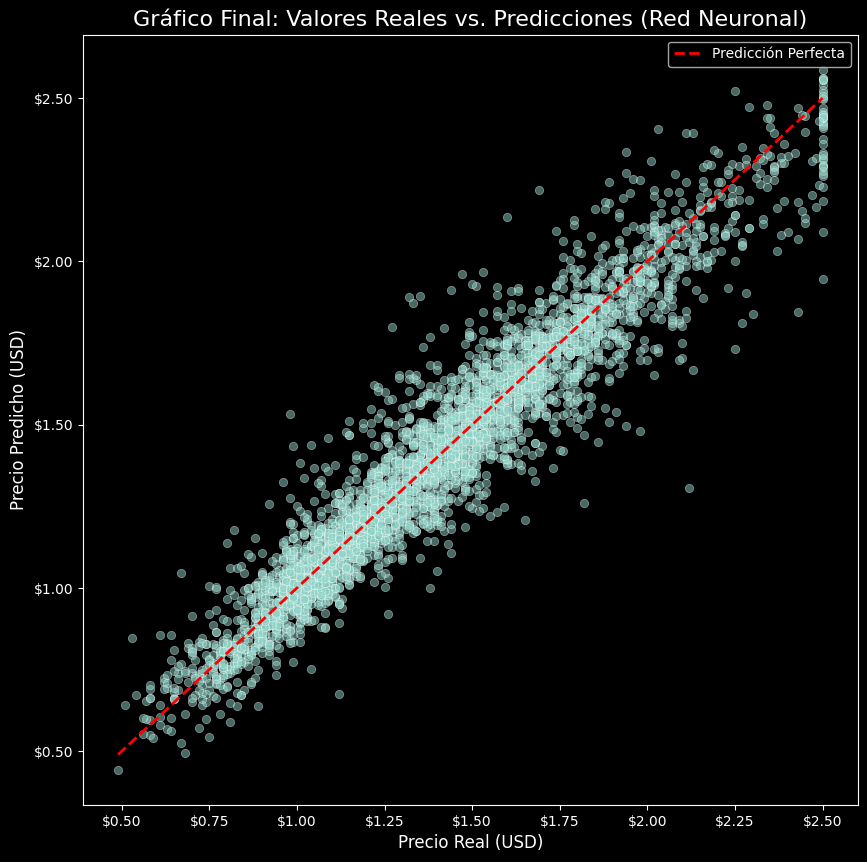

In [10]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

# Dibujamos la línea de predicción perfecta (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción Perfecta')

plt.title('Gráfico Final: Valores Reales vs. Predicciones (Red Neuronal)', fontsize=16)
plt.xlabel('Precio Real (USD)', fontsize=12)
plt.ylabel('Precio Predicho (USD)', fontsize=12)
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# --- Gráfico de Comparación de Modelos (Líneas Superpuestas) ---
# Asumimos que 'y_test', 'y_pred_lr', 'y_pred_rf', y 'y_pred_nn' 
# existen en memoria de la ejecución de la celda anterior.

print("Creando DataFrame de resultados para el gráfico...")

# 1. Crear un DataFrame con los resultados
# Usamos .values para evitar problemas de alineación de índices (si 'y_test' es una Serie)
results_df = pd.DataFrame({
    'Precio Real (y_test)': y_test.values,
    'Predicción Reg. Lineal': y_pred_lr,
    'Predicción Random Forest': y_pred_rf,
    'Predicción Red Neuronal': y_pred_nn
})

# 2. Ordenar el DataFrame por el 'Precio Real'
# Esto es CLAVE para que el gráfico de línea tenga sentido.
results_df_sorted = results_df.sort_values(by='Precio Real (y_test)').reset_index(drop=True)

# 3. Convertir de formato 'ancho' a 'largo' (melt)
# Esto es lo que Seaborn prefiere para crear leyendas automáticas.
results_melted = results_df_sorted.melt(
    value_vars=['Precio Real (y_test)', 'Predicción Reg. Lineal', 'Predicción Random Forest', 'Predicción Red Neuronal'],
    var_name='Modelo', # Nombre de la nueva columna de leyenda
    value_name='Precio (USD)', # Nombre de la nueva columna de valores Y
)
# Agregamos un índice de 'Muestra' para el eje X
results_melted['Muestra (ordenada por precio real)'] = results_melted.groupby('Modelo').cumcount()


print("Generando gráfico de líneas superpuestas...")

# 4. Graficar las líneas superpuestas
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=results_melted,
    x='Muestra (ordenada por precio real)',
    y='Precio (USD)',
    hue='Modelo', # 'hue' crea una línea de color diferente por 'Modelo'
    style='Modelo', # 'style' crea un estilo de línea diferente (ej. --, :)
    markers=False,  # Quitamos los marcadores para que sea más limpio
    lw=2 # Ancho de línea
)

# 5. Mejoras de Legibilidad
plt.title('Comparación de Modelos vs. Precio Real', fontsize=16)
plt.xlabel('Muestras del Test Set (Ordenadas por Precio Real)', fontsize=12)
plt.ylabel('Precio (USD)', fontsize=12)
plt.legend(title='Leyenda', loc='upper left')

# Formatear el eje Y como moneda
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.2f}'))

plt.tight_layout()
plt.show()